In [42]:
import pandas as pd
import re

data = pd.read_json('io/tutorial/manga.json', orient="values", encoding='ascii')
df = pd.DataFrame(data)
#df = df.drop(df.index[0:100])

In [43]:
def remove_brackets():
    for column in df:
        row = 0
        for items in df[column]:
            for i in items:
                df.set_value(row,column,i)
            row += 1
remove_brackets()

In [44]:
def remove_blank(column):
    row = 0
    for items in df[column]:
        df.set_value(row,column, items.strip())
        row += 1
remove_blank("reader")
remove_blank("score")
remove_blank("time")

In [45]:
def none():
    for column in df:
        row = 0
        for items in df[column]:
            if items == (u'N/A'):
                df.set_value(row,column,0)
            elif not items:
                df.set_value(row,column,"N/A")
            elif items == (u'?'):
                df.set_value(row,column,"N/A")
            row += 1
none()

In [46]:
def remove_comma(column):
    row = 0
    for items in df[column]:
        df.set_value(row,column,items.replace(',',''))
        row+=1
remove_comma("reader")

In [47]:
def year(column):
    row = 0
    for items in df[column]:
        m = re.search(r".*,\s\?*",items)
        if m:
            df.set_value(row,column,items[:m.start()] + items[m.end():])
        row += 1
def fillna():
    for columns in df:
        row = 0
        for items in df[columns]:
            if items == '':
                df.set_value(row,columns,0)
            row += 1
year("time")
fillna()

In [48]:
def to_float(column):
    row = 0
    for items in df[column]:
        df.set_value(row,column,float(items))
        row+=1
to_float("reader")
to_float("score")
to_float("time")

In [49]:
df = df.drop(df.index[0:100])
df = df.reset_index()
del df["index"]

,author,link,publisher,reader,score,time,title,volume
0,"Mashima, Hiro",https://myanimelist.net/manga/598/Fairy_Tail,Shounen Magazine (Weekly),155010,8.11,2006,Fairy Tail,N/A
1,"Oku, Hiroya",https://myanimelist.net/manga/564/Gantz,Young Jump,85746,8.25,2000,Gantz,37 vols
2,"Morisaki, Yuki",https://myanimelist.net/manga/45757/Shokugeki_...,Shounen Jump (Weekly),77639,8.61,2012,Shokugeki no Souma,N/A
3,"Hiramoto, Akira",https://myanimelist.net/manga/25297/Prison_School,Young Magazine (Weekly),57038,8.17,2011,Prison School,N/A
4,"Ikeda, Akihisa",https://myanimelist.net/manga/894/Rosario_to_V...,Shounen Jump (Monthly),54180,7.88,2004,Rosario to Vampire,10 vols
5,"Satou, Shouji",https://myanimelist.net/manga/669/Highschool_o...,Dragon Age,52358,7.87,2006,Highschool of the Dead,7 vols
6,Oh! Great,https://myanimelist.net/manga/74/Air_Gear,Shounen Magazine (Weekly),52078,7.93,2002,Air Gear,37 vols
7,"Fujisawa, Tohru",https://myanimelist.net/manga/336/GTO,Shounen Magazine (Weekly),50930,8.92,1996,GTO,25 vols
8,"Akamatsu, Ken",https://myanimelist.net/manga/15/Mahou_Sensei_...,Shounen Magazine (Weekly),46974,8.08,2003,Mahou Sensei Negima!,38 vols
9,CLAMP,https://myanimelist.net/manga/107/Chobits,Young Magazine (Weekly),44233,7.92,2000,Chobits,8 vols


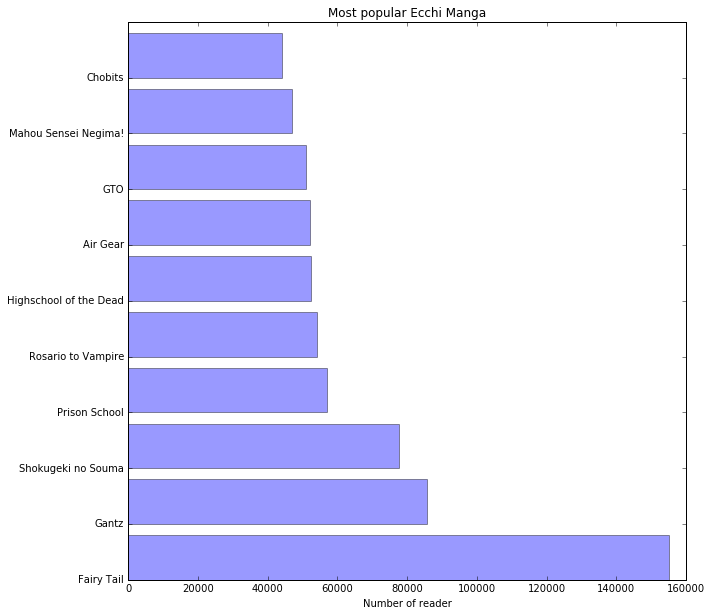

In [59]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

readerdf = df.sort_values(["reader"],ascending=False)
plt.figure(figsize=(10,10))
plt.xlabel('Number of reader')
plt.title('Most popular Ecchi Manga')
plt.barh(np.arange(len(readerdf["title"][0:10])),readerdf["reader"][0:10],alpha=0.4)
plt.yticks(np.arange(len(readerdf["title"][0:10])),readerdf["title"][0:10])
plt.show()

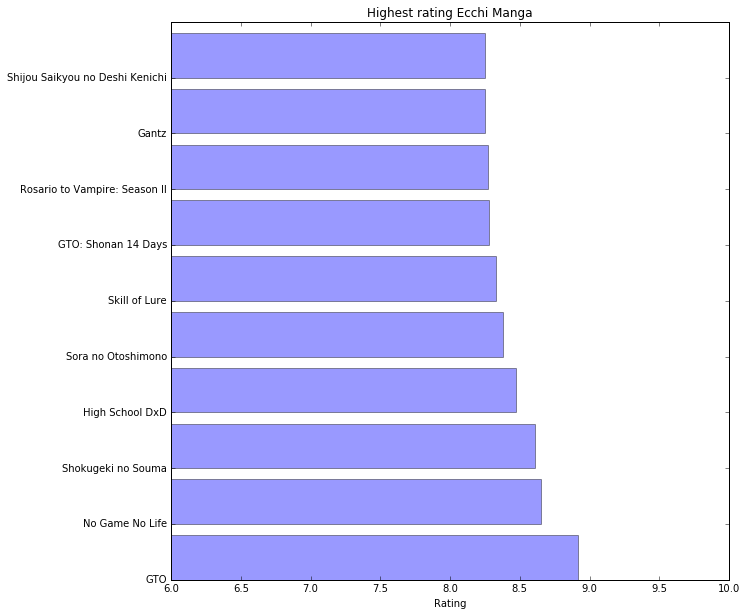

In [77]:
scoredf = df.sort_values(["score"],ascending=False)
plt.figure(figsize=(10,10))
plt.axis((6,10,0,10))
plt.xlabel('Rating')
plt.title('Highest rating Ecchi Manga')
plt.barh(np.arange(len(scoredf["title"][0:10])),scoredf["score"][0:10],alpha=0.4)
plt.yticks(np.arange(len(scoredf["title"][0:10])),scoredf["title"][0:10])
plt.show()

In [93]:
rating_per_publisher = []
for items in df["publisher"]:
    avg = np.mean(df[df["publisher"] == items]["score"])
    rating_per_publisher.append(avg)
publisher = pd.DataFrame({
        "publisher":df["publisher"],
        "rating":rating_per_publisher
    })
publisher = publisher.drop_duplicates()
publisher = publisher.sort_values(["rating"],ascending=False)

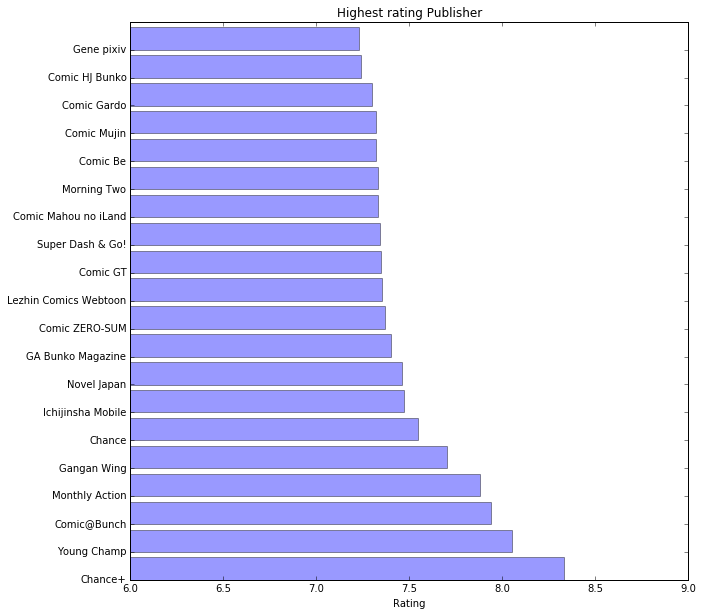

In [99]:
plt.figure(figsize=(10,10))
plt.axis((6,9,0,20))
plt.xlabel('Rating')
plt.title('Highest rating Publisher')
plt.barh(np.arange(len(publisher["publisher"][0:20])),publisher["rating"][0:20],alpha=0.4)
plt.yticks(np.arange(len(publisher["publisher"][0:20])),publisher["publisher"][0:20])
plt.show()